In [750]:
import pandas as pd
import numpy as np
import csv
from datetime import datetime
import requests
import json
import csv
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math

### Collect the weather data for a given time interval
1. link: https://darksky.net/dev

In [99]:
csv_columns = ['time', 'summary', 'icon', 'precipIntensity','precipProbability', 'temperature', 'apparentTemperature', 'dewPoint', 'humidity', 'pressure', 'windSpeed', 'windGust', 'windBearing', 'cloudCover', 'uvIndex', 'visibility', 'ozone']
import pandas as pd
from datetime import datetime
#csv_file = "Names.csv"
df = pd.DataFrame(columns=csv_columns)
dec = df.to_csv('weather.csv',index = False)       
tim = 1556649000
count = 0
debug=0
l = []
while(count<30):
    url = "https://api.darksky.net/forecast/7d5861af747b98aead0c3d5c9d44171c/23.0225,72.5714,"+str(tim)
    response = requests.get(url)
    data = response.text
    parsed = json.loads(data)
    h_data = parsed['hourly']['data']
    for d in h_data:
        d_c = []
        l.append(len(d))
        #if debug==282:
            #print("282 rows data :",len(d))
       # if debug==283:
            #print("**************************************************")
            #print("566 row data:",d)
            #print(len(d))
            #break
        for v in d.keys():
            if v=='time':
                    timestamp = d[v]
                    #print(timestamp)
                    d_c.append(datetime.fromtimestamp(timestamp).strftime('%Y-%m-%d %H:%M:%S'))
                    continue
           # else:
                #print(v)
            if v=='precipType':
                continue
            d_c.append(d[v])#(datetime.datetime.fromtimestamp(d[v]).strftime('%Y-%m-%d %H:%M:%S'))
    
        with open("weather.csv", "a") as fp:
            wr = csv.writer(fp, dialect='excel')
            wr.writerow(d_c)
        fp.close()
        debug = debug+1
    
    tim = tim+24*60*60
    count = count+1

In [751]:
data = pd.read_csv('weather.csv')
data.head()

,time,summary,icon,precipIntensity,precipProbability,temperature,apparentTemperature,dewPoint,humidity,pressure,windSpeed,windGust,windBearing,cloudCover,uvIndex,visibility,ozone
0,2019-05-01 00:00:00,Humid,clear-night,0.0,0.0,87.52,94.23,72.04,0.60,1004.21,7.41,7.98,223,0.0,0,2.488,266.4
1,2019-05-01 01:00:00,Clear,clear-night,0.0,0.0,87.53,91.36,68.33,0.53,1004.02,7.82,7.82,234,0.0,0,2.488,266.4
2,2019-05-01 02:00:00,Clear,clear-night,0.0,0.0,88.52,90.73,65.55,0.47,1003.73,6.02,7.35,258,0.0,0,2.488,266.4
3,2019-05-01 03:00:00,Clear,clear-night,0.0,0.0,88.63,90.89,65.63,0.47,1003.61,5.49,7.08,266,0.0,0,2.488,266.4
4,2019-05-01 04:00:00,Clear,clear-night,0.0,0.0,87.79,90.11,65.86,0.48,1003.65,6.78,7.54,236,0.0,0,2.488,266.4


In [752]:
data['cloudCover'].values

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.01, 0.02, 0.04, 0.04, 0.04, 0.04, 0.03,
       0.02, 0.01, 0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.09, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.23, 0.23, 0.19,
       0.16, 0.13, 0.12, 0.12, 0.11, 0.1 , 0.08, 0.06, 0.03, 0.01, 0.  ,
       0.  , 0.09, 0.19, 0.19, 0.19, 0.19, 0.37, 0.54, 0.47, 0.33, 0.18,
       0.1 , 0.07, 0.06, 0.05, 0.03, 0.02, 0.01, 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.09, 0.19, 0.09, 0.  , 0.  , 0.  , 0.

In [753]:
data.shape

(720, 17)

Text(0, 0.5, 'temperature')

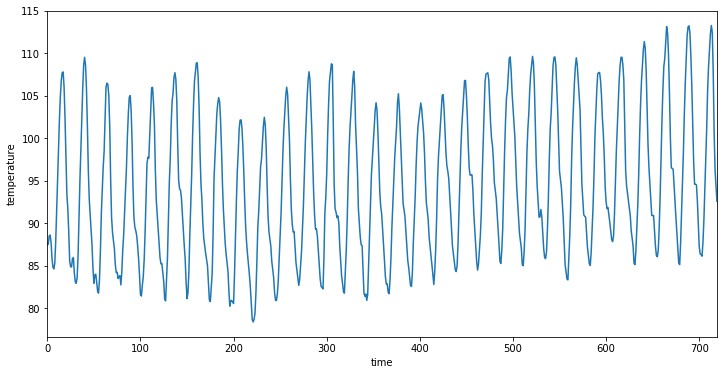

In [754]:
plt.figure(figsize=(12,6))
data['temperature'].plot()
plt.xlabel("time")
plt.ylabel("temperature")

In [755]:
tem = data['temperature'].values
hum = data['humidity'].values

In [756]:
temperature = []
for v in tem:
    temperature.append(v)
    temperature.append(temperature[-1])
    temperature.append(temperature[-1])

In [757]:
humidity = []
for v in hum:
    humidity.append(v)
    humidity.append(humidity[-1])
    humidity.append(humidity[-1])

In [758]:
len(temperature),len(humidity)

(2160, 2160)

Text(0, 0.5, 'temperature')

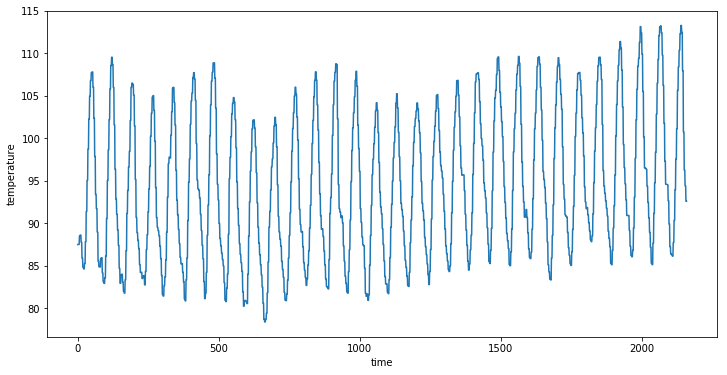

In [759]:
plt.figure(figsize=(12,6))
plt.plot(temperature)
plt.xlabel("time")
plt.ylabel("temperature")

## Convert the timestamp to date:

In [760]:
import requests
import pandas as pd
import os
import numpy as np
import simplejson as json
import time 


def time_to_epoch(yyyy, mm, dd, t):
    t_stamp = str(yyyy).zfill(4) + '-' + str(mm).zfill(2) + '-' + str(dd).zfill(2) + 'T' + str(t)
    time_tuple = time.strptime(t_stamp, '%Y-%m-%dT%H:%M')
    time_epoch = time.mktime(time_tuple)
    return time_epoch


def epoch_to_timestring(n):
    return time.strftime('%Y-%m-%dT%H:%M', time.localtime(n))


# some global variables
private_server_url = 'http://127.0.0.1:5000'
header = {'Content-Type':'application/json'}
imars_base_url = 'http://14.215.130.185:20000'
time_stamps_list = ['UID','00:00', '00:20', '00:40', '01:00', '01:20', '01:40', '02:00', '02:20', '02:40', '03:00', '03:20',
                    '03:40', '04:00', '04:20', '04:40', '05:00', '05:20', '05:40', '06:00', '06:20', '06:40', '07:00',
                    '07:20', '07:40', '08:00', '08:20', '08:40', '09:00', '09:20', '09:40', '10:00', '10:20', '10:40',
                    '11:00', '11:20', '11:40', '12:00', '12:20', '12:40', '13:00', '13:20', '13:40', '14:00', '14:20',
                    '14:40', '15:00', '15:20', '15:40', '16:00', '16:20', '16:40', '17:00', '17:20', '17:40', '18:00',
                    '18:20', '18:40', '19:00', '19:20', '19:40', '20:00', '20:20', '20:40', '21:00', '21:20', '21:40',
                    '22:00', '22:20', '22:40', '23:00', '23:20', '23:40']
device_ids = [33140, 32977, 32684, 32934, 32804, 33096, 32984, 32985, 32725, 19380, 33131]

# Session preserves cookies from login accross https calls
s = requests.session()
# login
auth_data_imars = [
  ('username', 'iitg_in'),
  ('password', 'invt')]
login_response_imars = s.request('POST', imars_base_url + '/login.action', data=auth_data_imars)


# yyyy = 2018
# mm = 10
# dd = 1
# device_id = device_ids[1]

# Func to retreive data from solar panel energy portal for given date
# date format: 'yyyy-mm-dd'
def get_data(device_id, yyyy, mm, dd):
    date = str(yyyy).zfill(4) + '-' + str(mm).zfill(2) + '-' + str(dd).zfill(2)
    params_report = (('level', '3'), ('type', '1'), ('searchIds', device_id), ('searchDate', date))
    # searchIds = ID for panels/inverter...level=?, type=?
    date_report = s.request('GET', imars_base_url + '/reportjson/exportReport.action', params=params_report)
    #print(date_report.url)

    try:
        output = open('./data/{}/{}'.format(device_id, date+'.xls'), 'wb')
    except FileNotFoundError:
        os.makedirs('./data/{}'.format(device_id))
        output = open('./data/{}/{}'.format(device_id, date+'.xls'), 'wb')

    output.write(date_report.content)
    output.close()

    pd_data = pd.ExcelFile('./data/{}/{}'.format(device_id, date+'.xls'))
    pd_data_day = pd.read_excel(pd_data, 'dayReport')
   # print(pd_data_day)
    energy = np.array(pd_data_day[1:2])
    device_name = energy[0][0]
    #print('device_name:',device_name)

    t = np.array(pd_data_day[:1])
    t = np.delete(t, np.s_[:1], 1)
    t_list = list(t[0])

    energy = np.delete(energy, np.s_[:1], 1)
    energy = energy.astype(np.float32, copy=False)
    energy_list = list(energy[0])

    dict_t_e = {}
    # dict_forDF = {'date': date, 'name': device_name}
    for t, e in zip(t_list, energy_list):
        dict_t_e.update({t: e})
    return dict_t_e


yyyy = 2019
mm = 4
#dd = 23
import csv
import datetime

csv_columns =   ['00:00', '00:20', '00:40', '01:00', '01:20', '01:40', '02:00', '02:20', '02:40', '03:00', '03:20',
                    '03:40', '04:00', '04:20', '04:40', '05:00', '05:20', '05:40', '06:00', '06:20', '06:40', '07:00',
                    '07:20', '07:40', '08:00', '08:20', '08:40', '09:00', '09:20', '09:40', '10:00', '10:20', '10:40',
                    '11:00', '11:20', '11:40', '12:00', '12:20', '12:40', '13:00', '13:20', '13:40', '14:00', '14:20',
                    '14:40', '15:00', '15:20', '15:40', '16:00', '16:20', '16:40', '17:00', '17:20', '17:40', '18:00',
                    '18:20', '18:40', '19:00', '19:20', '19:40', '20:00', '20:20', '20:40', '21:00', '21:20', '21:40',
                    '22:00', '22:20', '22:40', '23:00', '23:20', 'Date']

#csv_file = "Names.csv"
df = pd.DataFrame(columns=csv_columns)
# name of the csv is in month+year+station_name    
dec = df.to_csv('xyz.csv',index=False)

# device id 0 -> Firpeal Hostel Capacity -> 25 kW,Serial No -> I01161005922
# device id 1 -> Beauki Hostel, Capacity -> 15 kW, Serial No -> I01163009107
# device id 2 -> Chimair Hostel, Capacity -> 15 kW, Serial No -> I01161006486
# device id 3 -> Duven Hostel, Capacity -> 15 kW, Serial No -> I01161004187
# device id 4 -> Emiet Hostel Capacity -> 25 kW, Serial No -> I01161005921
# device id 5 -> No Working
# device id 6 -> Working but still unknown
# device id 7 -> Not Working
# device id 8 -> Not Working
# device id 9 -> Not Working
# device id 10 -> Aibaan Hostel, Capacity -> 25 Kw,Serial No -> I01161005931
# device id 11 -> 
device_id = device_ids[1]
count = 1
for dd in range(1,31):
    print("count: ",count)
    count+=1
    l = []
    dict_t_e=get_data(device_id, yyyy, mm, dd)
    x = datetime.datetime(yyyy,mm,dd)
    #print(dict_t_e)
    for d in dict_t_e.keys():
        l.append(dict_t_e[d])
    l.append(x)
    with open("xyz.csv", "a") as fp:
        wr = csv.writer(fp, dialect='excel')
        wr.writerow(l)
    fp.close()

count:  1
count:  2
count:  3
count:  4
count:  5
count:  6
count:  7
count:  8
count:  9
count:  10
count:  11
count:  12
count:  13
count:  14
count:  15
count:  16
count:  17
count:  18
count:  19
count:  20
count:  21
count:  22
count:  23
count:  24
count:  25
count:  26
count:  27
count:  28
count:  29
count:  30


In [761]:
data = pd.read_csv('xyz.csv')

In [762]:
data.shape

(30, 72)

In [763]:
data.head()

,00:00,00:20,00:40,01:00,01:20,01:40,02:00,02:20,02:40,03:00,...,20:40,21:00,21:20,21:40,22:00,22:20,22:40,23:00,23:20,Date
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-04-01 00:00:00
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-04-02 00:00:00
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-04-03 00:00:00
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-04-04 00:00:00
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-04-05 00:00:00


In [764]:
data = data.drop(['Date'],axis=1)

In [765]:
data.shape

(30, 71)

In [766]:
data.head()

,00:00,00:20,00:40,01:00,01:20,01:40,02:00,02:20,02:40,03:00,...,20:20,20:40,21:00,21:20,21:40,22:00,22:20,22:40,23:00,23:20
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [767]:
dx = np.array(temperature).reshape((30, 72)) # temperature
dy = np.array(humidity).reshape((30,72)) #humidity

In [768]:
dx.shape

(30, 72)

In [769]:
cl = list(data.columns)

In [770]:
cl.append('23:40')

In [771]:
temperature = pd.DataFrame(dx,columns=cl)
#energy = data.drop(['Date'],axis=1)
#temperature = temperature.drop([71],axis=1)
humidity = pd.DataFrame(dy,columns=cl)

In [772]:
temperature.head()

,00:00,00:20,00:40,01:00,01:20,01:40,02:00,02:20,02:40,03:00,...,20:40,21:00,21:20,21:40,22:00,22:20,22:40,23:00,23:20,23:40
0,87.52,87.52,87.52,87.53,87.53,87.53,88.52,88.52,88.52,88.63,...,97.87,93.41,93.41,93.41,91.74,91.74,91.74,88.98,88.98,88.98
1,85.57,85.57,85.57,84.91,84.91,84.91,84.87,84.87,84.87,85.86,...,96.36,92.86,92.86,92.86,91.07,91.07,91.07,89.25,89.25,89.25
2,87.42,87.42,87.42,84.72,84.72,84.72,82.96,82.96,82.96,83.93,...,95.18,90.70,90.70,90.70,88.92,88.92,88.92,88.01,88.01,88.01
3,87.04,87.04,87.04,85.16,85.16,85.16,84.22,84.22,84.22,84.26,...,94.22,90.70,90.70,90.70,89.54,89.54,89.54,89.14,89.14,89.14
4,88.55,88.55,88.55,87.32,87.32,87.32,85.86,85.86,85.86,83.88,...,96.24,92.73,92.73,92.73,91.02,91.02,91.02,89.30,89.30,89.30


In [773]:
humidity.shape

(30, 72)

In [774]:
temperature.shape,energy.shape

((30, 72), (30, 35))

In [775]:
temperature = temperature.drop(['23:40'],axis=1)
humidity = humidity.drop(['23:40'],axis=1)

[]

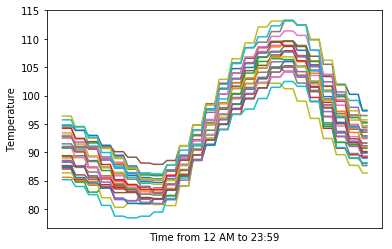

In [776]:
for d in temperature.values:
    plt.plot(d)
plt.xlabel("Time from 12 AM to 23:59")
plt.ylabel("Temperature")
plt.xticks([])
plt.plot()

### Taking reading from 6 am to 6 pm in the evening

In [777]:
temperature = (temperature.T.iloc[20:55]).T
humidity = (humidity.T.iloc[20:55]).T
energy = (data.T.iloc[20:55]).T

In [778]:
temperature.head()  #temperature data

,06:40,07:00,07:20,07:40,08:00,08:20,08:40,09:00,09:20,09:40,...,15:00,15:20,15:40,16:00,16:20,16:40,17:00,17:20,17:40,18:00
0,84.88,84.65,84.65,84.65,85.29,85.29,85.29,87.85,87.85,87.85,...,106.80,106.80,106.80,107.74,107.74,107.74,107.81,107.81,107.81,106.01
1,83.15,82.95,82.95,82.95,83.61,83.61,83.61,86.16,86.16,86.16,...,108.57,108.57,108.57,109.54,109.54,109.54,108.66,108.66,108.66,106.00
2,82.01,81.80,81.80,81.80,83.37,83.37,83.37,86.79,86.79,86.79,...,106.01,106.01,106.01,106.50,106.50,106.50,106.34,106.34,106.34,105.07
3,83.85,82.77,82.77,82.77,84.35,84.35,84.35,86.92,86.92,86.92,...,102.96,102.96,102.96,104.86,104.86,104.86,105.03,105.03,105.03,103.28
4,82.70,83.72,83.72,83.72,85.72,85.72,85.72,88.97,88.97,88.97,...,103.14,103.14,103.14,105.94,105.94,105.94,106.00,106.00,106.00,104.21


In [779]:
energy.head(5)  # energy data

,06:40,07:00,07:20,07:40,08:00,08:20,08:40,09:00,09:20,09:40,...,15:00,15:20,15:40,16:00,16:20,16:40,17:00,17:20,17:40,18:00
0.0,0.706,1.366,2.404,3.546,4.682,5.748,6.744,7.614,8.452,9.190,...,8.190,7.243,6.175,5.376,4.478,3.439,2.252,1.329,0.748,0.334
0.0,0.752,1.428,2.450,3.574,4.774,5.847,6.792,7.541,8.396,9.002,...,8.362,7.764,6.894,5.927,4.816,3.532,2.394,1.450,0.831,0.352
0.0,0.758,1.406,2.438,3.576,4.744,5.760,6.751,7.604,8.302,9.062,...,8.470,7.783,6.903,5.754,4.772,3.732,2.491,1.448,0.743,0.326
0.0,0.758,1.439,2.430,3.532,4.668,5.751,6.708,7.591,8.383,8.986,...,8.402,7.946,6.964,5.982,4.896,3.712,2.569,1.470,0.740,0.325
0.0,0.762,1.368,2.316,3.407,4.514,5.591,6.510,7.305,8.161,8.847,...,8.314,7.478,6.602,5.628,4.635,3.482,2.379,1.389,0.758,0.351


In [780]:
humidity.head()

,06:40,07:00,07:20,07:40,08:00,08:20,08:40,09:00,09:20,09:40,...,15:00,15:20,15:40,16:00,16:20,16:40,17:00,17:20,17:40,18:00
0,0.51,0.49,0.49,0.49,0.48,0.48,0.48,0.44,0.44,0.44,...,0.13,0.13,0.13,0.12,0.12,0.12,0.12,0.12,0.12,0.12
1,0.42,0.45,0.45,0.45,0.49,0.49,0.49,0.46,0.46,0.46,...,0.14,0.14,0.14,0.12,0.12,0.12,0.12,0.12,0.12,0.12
2,0.52,0.54,0.54,0.54,0.51,0.51,0.51,0.44,0.44,0.44,...,0.14,0.14,0.14,0.13,0.13,0.13,0.14,0.14,0.14,0.17
3,0.45,0.50,0.50,0.50,0.51,0.51,0.51,0.47,0.47,0.47,...,0.23,0.23,0.23,0.19,0.19,0.19,0.18,0.18,0.18,0.24
4,0.56,0.55,0.55,0.55,0.51,0.51,0.51,0.44,0.44,0.44,...,0.26,0.26,0.26,0.24,0.24,0.24,0.22,0.22,0.22,0.20


## converting temperature and energy in one column

In [781]:
tem,ene,hum = [],[],[]
for i in range(len(temperature.values)):
    for j in range(len(temperature.values[0])):
        tem.append(temperature.values[i][j])
for i in range(len(energy.values)):
    for j in range(len(energy.values[0])):
        ene.append(energy.values[i][j])
for i in range(len(humidity.values)):
    for j in range(len(humidity.values[0])):
        hum.append(humidity.values[i][j])

In [782]:
data = pd.DataFrame(columns=['Temperature','Energy'])

In [783]:
data['Temperature'] = tem
data['Energy'] = ene

In [784]:
data.shape

(1050, 2)

### Applying svm model

X_train -> time , Y_train -> Energy 

In [785]:
data.head()

,Temperature,Energy
0,84.88,0.706
1,84.65,1.366
2,84.65,2.404
3,84.65,3.546
4,85.29,4.682


### Preparing data for modeling

<h5>X_train - > Temperature, Energy</h5>
<h5>Y_train -> Energy</h5>

In [786]:
x = data['Energy'].values[1:]

In [787]:
x.shape

(1049,)

In [788]:
data = data.iloc[:1049]

In [789]:
data['Predicted_Energy'] = x

In [790]:
data.shape

(1049, 3)

In [791]:
data.head()

,Temperature,Energy,Predicted_Energy
0,84.88,0.706,1.366
1,84.65,1.366,2.404
2,84.65,2.404,3.546
3,84.65,3.546,4.682
4,85.29,4.682,5.748


In [792]:
X_train = data[['Temperature','Energy']].iloc[:750]
X_test = data[['Temperature','Energy']].iloc[750:]
y_train = data['Predicted_Energy'].iloc[:750]
y_test = data['Predicted_Energy'].iloc[750:]

In [793]:
from sklearn.svm import SVR

# applying SVM over the data using rbf kernel
from sklearn.svm import SVR
opt_v = 99999
y_opt = []
for c in [.001,.01,.1,1,10,100,1000]:
    reg = SVR(kernel='linear',gamma = 'auto',C=c)
    reg.fit(X_train,y_train)
    y_pred = reg.predict(X_test)
    y_pred1 = reg.predict(X_train)
    m = mean_squared_error(y_test,y_pred)
    m1 = mean_squared_error(y_train,y_pred1)
    print("Root Mean squared error using SVM on test data:", math.sqrt(m))
    #print("Root Mean squared error using SVM on train data:", math.sqrt(m1))
    if math.sqrt(m) < opt_v:
        opt_v = math.sqrt(m)
        y_opt = y_pred

Root Mean squared error using SVM on test data: 0.3937397198458343
Root Mean squared error using SVM on test data: 0.40471358197267954
Root Mean squared error using SVM on test data: 0.4070230529663191
Root Mean squared error using SVM on test data: 0.40883317094841004
Root Mean squared error using SVM on test data: 0.4039672699116661
Root Mean squared error using SVM on test data: 0.47265918596408196
Root Mean squared error using SVM on test data: 1.0794808187108873


In [795]:
len(y_opt),len(y_test)

(299, 299)

Mean squared error using SVM : 0.3937397198458343
MAPE using SVM : 6.309936384938337


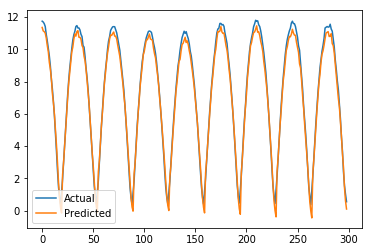

In [798]:
plt.plot(y_test.values)
plt.plot(y_opt)
plt.legend(["Actual","Predicted"])
print("Mean squared error using SVM :", opt_v)
print("MAPE using SVM :", MAPE(y_test.values,y_opt))

In [797]:
def MAPE(y,yhat):
    d = 0
    for i in range(len(y)):
        d = d + (y[i]-yhat[i])/y[i]
    return (100*d)/len(y)

In [799]:
from sklearn.svm import SVR

# applying SVM over the data using rbf kernel
from sklearn.svm import SVR
opt_v = 99999
y_opt = []
for c in [.001,.01,.1,1,10,100,1000]:
    reg = SVR(kernel='rbf',gamma = 'auto',C=c)
    reg.fit(X_train,y_train)
    y_pred = reg.predict(X_test)
    y_pred1 = reg.predict(X_train)
    m = mean_squared_error(y_test,y_pred)
    m1 = mean_squared_error(y_train,y_pred1)
    print("Root Mean squared error using SVM on test data:", math.sqrt(m))
    #print("Root Mean squared error using SVM on train data:", math.sqrt(m1))
    if math.sqrt(m) < opt_v:
        opt_v = math.sqrt(m)
        y_opt = y_pred

Root Mean squared error using SVM on test data: 3.6999447028746353
Root Mean squared error using SVM on test data: 3.573667135771474
Root Mean squared error using SVM on test data: 2.596008142482594
Root Mean squared error using SVM on test data: 1.4537357199949992
Root Mean squared error using SVM on test data: 1.3552878406105417
Root Mean squared error using SVM on test data: 1.353900023206818
Root Mean squared error using SVM on test data: 1.3680167589243213


Mean squared error using SVM : 1.353900023206818
MAPE using SVM : -33.80141593933126


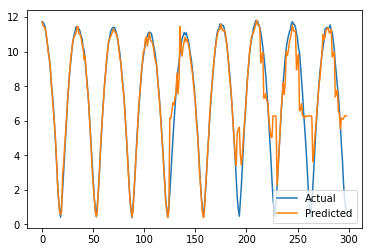

In [801]:
plt.plot(y_test.values)
plt.plot(y_opt)
plt.legend(["Actual","Predicted"])
print("Mean squared error using SVM :", opt_v)
print("MAPE using SVM :", MAPE(y_test.values,y_opt))

## Applying Nural Network

In [551]:
data.head()

,Temperature,Energy,Predicted_Energy,0,1,2,3,4,5,6,...,26,27,28,29,30,31,32,33,34,Humidity
0,84.88,0.772,1.458,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.51
1,84.65,1.458,2.518,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.49
2,84.65,2.518,3.642,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.49
3,84.65,3.642,4.746,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.49
4,85.29,4.746,5.948,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.48


In [553]:
train_data,test_data = data.drop(['Predicted_Energy','Energy'],axis=1).iloc[:750],data.drop(['Predicted_Energy','Energy'],axis=1).iloc[750:]
train_y,test_y = data['Predicted_Energy'].iloc[:750].values,data['Predicted_Energy'].iloc[750:].values

In [554]:
import tensorflow
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils import np_utils  
import seaborn as sns
from keras import layers
from keras.initializers import RandomNormal
import random
import keras

In [557]:
#random.seed(40)
model = Sequential()
model.add(Dense(1, input_shape=(train_data.shape[1],), activation='sigmoid', kernel_initializer='lecun_uniform'))
model.add(Dense(64,activation = 'tanh'))
#model.add(layers.Dropout(0.2))

keras.regularizers.l1_l2(l1=0.01)
#model.add(Dense(64,activation = 'sigmoid'))
#model.add(layers.Dropout(0.2))

model.add(Dense(1,activation = 'relu'))
#model.add(Dense(1,activation = 'sigmoid'))
#model.add(Dense(1,activation = 'relu'))
#model.add(Dense(1))#,activation = 'sigmoid'))
#model.add(Dense(1,activation = 'relu'))
model.compile(optimizer=Adam(lr=0.01), loss='mean_squared_error')
model.fit(train_data, train_y, batch_size=100, epochs=1500, verbose=1)

Epoch 1/1500
750/750 [==============================] - 2s 2ms/step - loss: 48.0797
Epoch 2/1500
750/750 [==============================] - 0s 21us/step - loss: 23.6412
Epoch 3/1500
750/750 [==============================] - 0s 27us/step - loss: 14.1531
Epoch 4/1500
750/750 [==============================] - 0s 21us/step - loss: 15.2104
Epoch 5/1500
750/750 [==============================] - 0s 24us/step - loss: 14.1361
Epoch 6/1500
750/750 [==============================] - 0s 29us/step - loss: 13.7810
Epoch 7/1500
750/750 [==============================] - 0s 21us/step - loss: 13.7494
Epoch 8/1500
750/750 [==============================] - 0s 27us/step - loss: 13.6568
Epoch 9/1500
750/750 [==============================] - 0s 25us/step - loss: 13.6303
Epoch 10/1500
750/750 [==============================] - 0s 28us/step - loss: 13.6076
Epoch 11/1500
750/750 [==============================] - 0s 23us/step - loss: 13.6289
Epoch 12/1500
750/750 [==============================] - 0s 25us

750/750 [==============================] - 0s 27us/step - loss: 13.6505
Epoch 97/1500
750/750 [==============================] - 0s 21us/step - loss: 13.6488
Epoch 98/1500
750/750 [==============================] - 0s 23us/step - loss: 13.6318
Epoch 99/1500
750/750 [==============================] - 0s 31us/step - loss: 13.6311
Epoch 100/1500
750/750 [==============================] - 0s 27us/step - loss: 13.6527
Epoch 101/1500
750/750 [==============================] - 0s 24us/step - loss: 13.7798
Epoch 102/1500
750/750 [==============================] - 0s 24us/step - loss: 13.6432
Epoch 103/1500
750/750 [==============================] - 0s 23us/step - loss: 13.6333
Epoch 104/1500
750/750 [==============================] - 0s 24us/step - loss: 13.6327
Epoch 105/1500
750/750 [==============================] - 0s 21us/step - loss: 13.6474
Epoch 106/1500
750/750 [==============================] - 0s 21us/step - loss: 13.6382
Epoch 107/1500
750/750 [==============================] - 0s 

750/750 [==============================] - 0s 28us/step - loss: 13.6205
Epoch 191/1500
750/750 [==============================] - 0s 23us/step - loss: 13.6396
Epoch 192/1500
750/750 [==============================] - 0s 29us/step - loss: 13.6329
Epoch 193/1500
750/750 [==============================] - 0s 35us/step - loss: 13.6188
Epoch 194/1500
750/750 [==============================] - 0s 27us/step - loss: 13.6255
Epoch 195/1500
750/750 [==============================] - 0s 27us/step - loss: 13.6389
Epoch 196/1500
750/750 [==============================] - 0s 29us/step - loss: 13.6495
Epoch 197/1500
750/750 [==============================] - 0s 29us/step - loss: 13.6729
Epoch 198/1500
750/750 [==============================] - 0s 29us/step - loss: 13.6243
Epoch 199/1500
750/750 [==============================] - 0s 25us/step - loss: 13.6501
Epoch 200/1500
750/750 [==============================] - 0s 25us/step - loss: 13.6276
Epoch 201/1500
750/750 [==============================] - 

750/750 [==============================] - 0s 25us/step - loss: 13.6499
Epoch 285/1500
750/750 [==============================] - 0s 26us/step - loss: 13.6370
Epoch 286/1500
750/750 [==============================] - 0s 29us/step - loss: 13.6188
Epoch 287/1500
750/750 [==============================] - 0s 31us/step - loss: 13.6305
Epoch 288/1500
750/750 [==============================] - 0s 24us/step - loss: 13.6450
Epoch 289/1500
750/750 [==============================] - 0s 25us/step - loss: 13.7291
Epoch 290/1500
750/750 [==============================] - 0s 27us/step - loss: 13.6158
Epoch 291/1500
750/750 [==============================] - 0s 28us/step - loss: 13.6767
Epoch 292/1500
750/750 [==============================] - 0s 25us/step - loss: 13.8246
Epoch 293/1500
750/750 [==============================] - 0s 23us/step - loss: 13.5853
Epoch 294/1500
750/750 [==============================] - 0s 23us/step - loss: 13.7455
Epoch 295/1500
750/750 [==============================] - 

750/750 [==============================] - 0s 28us/step - loss: 13.6341
Epoch 379/1500
750/750 [==============================] - 0s 27us/step - loss: 13.6058
Epoch 380/1500
750/750 [==============================] - 0s 25us/step - loss: 13.6479
Epoch 381/1500
750/750 [==============================] - 0s 27us/step - loss: 13.6350
Epoch 382/1500
750/750 [==============================] - 0s 32us/step - loss: 13.6014
Epoch 383/1500
750/750 [==============================] - 0s 28us/step - loss: 13.6359
Epoch 384/1500
750/750 [==============================] - 0s 28us/step - loss: 13.7071
Epoch 385/1500
750/750 [==============================] - 0s 33us/step - loss: 13.7323
Epoch 386/1500
750/750 [==============================] - 0s 28us/step - loss: 13.6650
Epoch 387/1500
750/750 [==============================] - 0s 23us/step - loss: 13.6832
Epoch 388/1500
750/750 [==============================] - 0s 24us/step - loss: 13.6353
Epoch 389/1500
750/750 [==============================] - 

750/750 [==============================] - 0s 21us/step - loss: 13.6452
Epoch 473/1500
750/750 [==============================] - 0s 24us/step - loss: 13.6137
Epoch 474/1500
750/750 [==============================] - 0s 28us/step - loss: 13.6321
Epoch 475/1500
750/750 [==============================] - 0s 27us/step - loss: 13.6226
Epoch 476/1500
750/750 [==============================] - 0s 31us/step - loss: 13.6423
Epoch 477/1500
750/750 [==============================] - 0s 31us/step - loss: 13.6146
Epoch 478/1500
750/750 [==============================] - 0s 27us/step - loss: 13.7028
Epoch 479/1500
750/750 [==============================] - 0s 28us/step - loss: 13.6338
Epoch 480/1500
750/750 [==============================] - 0s 23us/step - loss: 13.6464
Epoch 481/1500
750/750 [==============================] - 0s 27us/step - loss: 13.5993
Epoch 482/1500
750/750 [==============================] - 0s 25us/step - loss: 13.6548
Epoch 483/1500
750/750 [==============================] - 

750/750 [==============================] - 0s 25us/step - loss: 13.6561
Epoch 567/1500
750/750 [==============================] - 0s 19us/step - loss: 13.6628
Epoch 568/1500
750/750 [==============================] - 0s 24us/step - loss: 13.6732
Epoch 569/1500
750/750 [==============================] - 0s 28us/step - loss: 13.6243
Epoch 570/1500
750/750 [==============================] - 0s 32us/step - loss: 13.6696
Epoch 571/1500
750/750 [==============================] - 0s 27us/step - loss: 13.6544
Epoch 572/1500
750/750 [==============================] - 0s 23us/step - loss: 13.6302
Epoch 573/1500
750/750 [==============================] - 0s 23us/step - loss: 13.6436
Epoch 574/1500
750/750 [==============================] - 0s 29us/step - loss: 13.6605
Epoch 575/1500
750/750 [==============================] - 0s 25us/step - loss: 13.6077
Epoch 576/1500
750/750 [==============================] - 0s 27us/step - loss: 13.6520
Epoch 577/1500
750/750 [==============================] - 

750/750 [==============================] - 0s 25us/step - loss: 13.6301
Epoch 661/1500
750/750 [==============================] - 0s 23us/step - loss: 13.6406
Epoch 662/1500
750/750 [==============================] - 0s 23us/step - loss: 13.6364
Epoch 663/1500
750/750 [==============================] - 0s 25us/step - loss: 13.6694
Epoch 664/1500
750/750 [==============================] - 0s 25us/step - loss: 13.6195
Epoch 665/1500
750/750 [==============================] - 0s 24us/step - loss: 13.7212
Epoch 666/1500
750/750 [==============================] - 0s 28us/step - loss: 13.6781
Epoch 667/1500
750/750 [==============================] - 0s 23us/step - loss: 13.6462
Epoch 668/1500
750/750 [==============================] - 0s 23us/step - loss: 13.6777
Epoch 669/1500
750/750 [==============================] - 0s 24us/step - loss: 13.6430
Epoch 670/1500
750/750 [==============================] - 0s 25us/step - loss: 13.6213
Epoch 671/1500
750/750 [==============================] - 

750/750 [==============================] - 0s 21us/step - loss: 13.6148
Epoch 755/1500
750/750 [==============================] - 0s 17us/step - loss: 13.6340
Epoch 756/1500
750/750 [==============================] - 0s 21us/step - loss: 13.6172
Epoch 757/1500
750/750 [==============================] - 0s 24us/step - loss: 13.6172
Epoch 758/1500
750/750 [==============================] - 0s 21us/step - loss: 13.6597
Epoch 759/1500
750/750 [==============================] - 0s 31us/step - loss: 13.6092
Epoch 760/1500
750/750 [==============================] - 0s 31us/step - loss: 13.6281
Epoch 761/1500
750/750 [==============================] - 0s 35us/step - loss: 13.6135
Epoch 762/1500
750/750 [==============================] - 0s 39us/step - loss: 13.6454
Epoch 763/1500
750/750 [==============================] - 0s 37us/step - loss: 13.6221
Epoch 764/1500
750/750 [==============================] - 0s 31us/step - loss: 13.6198
Epoch 765/1500
750/750 [==============================] - 

750/750 [==============================] - 0s 21us/step - loss: 13.6378
Epoch 849/1500
750/750 [==============================] - 0s 17us/step - loss: 13.6233
Epoch 850/1500
750/750 [==============================] - 0s 21us/step - loss: 13.6661
Epoch 851/1500
750/750 [==============================] - 0s 20us/step - loss: 13.6270
Epoch 852/1500
750/750 [==============================] - 0s 19us/step - loss: 13.6582
Epoch 853/1500
750/750 [==============================] - 0s 25us/step - loss: 13.6153
Epoch 854/1500
750/750 [==============================] - 0s 25us/step - loss: 13.6717
Epoch 855/1500
750/750 [==============================] - 0s 24us/step - loss: 13.6298
Epoch 856/1500
750/750 [==============================] - 0s 27us/step - loss: 13.6296
Epoch 857/1500
750/750 [==============================] - 0s 31us/step - loss: 13.6210
Epoch 858/1500
750/750 [==============================] - 0s 32us/step - loss: 13.6106
Epoch 859/1500
750/750 [==============================] - 

750/750 [==============================] - 0s 19us/step - loss: 13.6243
Epoch 943/1500
750/750 [==============================] - 0s 21us/step - loss: 13.6125
Epoch 944/1500
750/750 [==============================] - 0s 23us/step - loss: 13.6402
Epoch 945/1500
750/750 [==============================] - 0s 27us/step - loss: 13.6895
Epoch 946/1500
750/750 [==============================] - 0s 25us/step - loss: 13.6027
Epoch 947/1500
750/750 [==============================] - 0s 21us/step - loss: 13.7036
Epoch 948/1500
750/750 [==============================] - 0s 24us/step - loss: 13.6340
Epoch 949/1500
750/750 [==============================] - 0s 24us/step - loss: 13.7301
Epoch 950/1500
750/750 [==============================] - 0s 19us/step - loss: 13.6361
Epoch 951/1500
750/750 [==============================] - 0s 23us/step - loss: 13.6319
Epoch 952/1500
750/750 [==============================] - 0s 21us/step - loss: 13.6362
Epoch 953/1500
750/750 [==============================] - 

750/750 [==============================] - 0s 15us/step - loss: 13.6391
Epoch 1036/1500
750/750 [==============================] - 0s 24us/step - loss: 13.6103
Epoch 1037/1500
750/750 [==============================] - 0s 31us/step - loss: 13.6432
Epoch 1038/1500
750/750 [==============================] - 0s 27us/step - loss: 13.6641
Epoch 1039/1500
750/750 [==============================] - 0s 25us/step - loss: 13.6645
Epoch 1040/1500
750/750 [==============================] - 0s 23us/step - loss: 13.6236
Epoch 1041/1500
750/750 [==============================] - 0s 20us/step - loss: 13.6425
Epoch 1042/1500
750/750 [==============================] - 0s 23us/step - loss: 13.6428
Epoch 1043/1500
750/750 [==============================] - 0s 19us/step - loss: 13.6386
Epoch 1044/1500
750/750 [==============================] - 0s 24us/step - loss: 13.6159
Epoch 1045/1500
750/750 [==============================] - 0s 21us/step - loss: 13.6198
Epoch 1046/1500
750/750 [=======================

750/750 [==============================] - 0s 28us/step - loss: 13.6266
Epoch 1129/1500
750/750 [==============================] - 0s 29us/step - loss: 13.6720
Epoch 1130/1500
750/750 [==============================] - 0s 27us/step - loss: 13.6326
Epoch 1131/1500
750/750 [==============================] - 0s 24us/step - loss: 13.6134
Epoch 1132/1500
750/750 [==============================] - 0s 25us/step - loss: 13.6263
Epoch 1133/1500
750/750 [==============================] - 0s 24us/step - loss: 13.6327
Epoch 1134/1500
750/750 [==============================] - 0s 25us/step - loss: 13.6106
Epoch 1135/1500
750/750 [==============================] - 0s 32us/step - loss: 13.6151
Epoch 1136/1500
750/750 [==============================] - 0s 29us/step - loss: 13.6133
Epoch 1137/1500
750/750 [==============================] - 0s 25us/step - loss: 13.6496
Epoch 1138/1500
750/750 [==============================] - 0s 29us/step - loss: 13.6206
Epoch 1139/1500
750/750 [=======================

750/750 [==============================] - 0s 24us/step - loss: 13.6466
Epoch 1222/1500
750/750 [==============================] - 0s 21us/step - loss: 13.6366
Epoch 1223/1500
750/750 [==============================] - 0s 20us/step - loss: 13.6125
Epoch 1224/1500
750/750 [==============================] - 0s 22us/step - loss: 13.6447
Epoch 1225/1500
750/750 [==============================] - 0s 24us/step - loss: 13.6350
Epoch 1226/1500
750/750 [==============================] - 0s 23us/step - loss: 13.6319
Epoch 1227/1500
750/750 [==============================] - 0s 25us/step - loss: 13.6377
Epoch 1228/1500
750/750 [==============================] - 0s 24us/step - loss: 13.6580
Epoch 1229/1500
750/750 [==============================] - 0s 24us/step - loss: 13.6085
Epoch 1230/1500
750/750 [==============================] - 0s 23us/step - loss: 13.6163
Epoch 1231/1500
750/750 [==============================] - 0s 23us/step - loss: 13.6250
Epoch 1232/1500
750/750 [=======================

750/750 [==============================] - 0s 24us/step - loss: 13.6624
Epoch 1314/1500
750/750 [==============================] - 0s 21us/step - loss: 13.6346
Epoch 1315/1500
750/750 [==============================] - 0s 23us/step - loss: 13.6612
Epoch 1316/1500
750/750 [==============================] - 0s 31us/step - loss: 13.6405
Epoch 1317/1500
750/750 [==============================] - 0s 29us/step - loss: 13.6300
Epoch 1318/1500
750/750 [==============================] - 0s 25us/step - loss: 13.6273
Epoch 1319/1500
750/750 [==============================] - 0s 25us/step - loss: 13.6171
Epoch 1320/1500
750/750 [==============================] - 0s 27us/step - loss: 13.6235
Epoch 1321/1500
750/750 [==============================] - 0s 27us/step - loss: 13.6163
Epoch 1322/1500
750/750 [==============================] - 0s 24us/step - loss: 13.6305
Epoch 1323/1500
750/750 [==============================] - 0s 25us/step - loss: 13.6251
Epoch 1324/1500
750/750 [=======================

750/750 [==============================] - 0s 25us/step - loss: 13.6241
Epoch 1407/1500
750/750 [==============================] - 0s 17us/step - loss: 13.6211
Epoch 1408/1500
750/750 [==============================] - 0s 21us/step - loss: 13.6182
Epoch 1409/1500
750/750 [==============================] - 0s 24us/step - loss: 13.6782
Epoch 1410/1500
750/750 [==============================] - 0s 25us/step - loss: 13.6073
Epoch 1411/1500
750/750 [==============================] - 0s 24us/step - loss: 13.6740
Epoch 1412/1500
750/750 [==============================] - 0s 23us/step - loss: 13.6497
Epoch 1413/1500
750/750 [==============================] - 0s 27us/step - loss: 13.6276
Epoch 1414/1500
750/750 [==============================] - 0s 24us/step - loss: 13.6304
Epoch 1415/1500
750/750 [==============================] - 0s 24us/step - loss: 13.6197
Epoch 1416/1500
750/750 [==============================] - 0s 23us/step - loss: 13.6140
Epoch 1417/1500
750/750 [=======================

750/750 [==============================] - 0s 21us/step - loss: 13.6164
Epoch 1500/1500
750/750 [==============================] - 0s 16us/step - loss: 13.6389


In [482]:
train_data,test_data = data.drop(['Predicted_Energy'],axis=1).iloc[:750],data.drop(['Predicted_Energy'],axis=1).iloc[750:]
train_y,test_y = data['Predicted_Energy'].iloc[:750].values,data['Predicted_Energy'].iloc[750:].values

In [479]:
train_data,test_data = np.reshape(train_data.values, (-1, 1)),np.reshape(test_data.values,(-1,1))

In [548]:
#random.seed(40)
model = Sequential()
model.add(Dense(1, input_shape=(train_data.shape[1],), activation='sigmoid', kernel_initializer='lecun_uniform'))
model.add(Dense(64,activation = 'tanh'))
#model.add(layers.Dropout(0.2))

keras.regularizers.l1_l2(l1=0.01)
#model.add(Dense(64,activation = 'sigmoid'))
#model.add(layers.Dropout(0.2))

model.add(Dense(1,activation = 'relu'))
#model.add(Dense(1,activation = 'sigmoid'))
#model.add(Dense(1,activation = 'relu'))
#model.add(Dense(1))#,activation = 'sigmoid'))
#model.add(Dense(1,activation = 'relu'))
model.compile(optimizer=Adam(lr=0.01), loss='mean_squared_error')
model.fit(train_data, train_y, batch_size=100, epochs=1500, verbose=1)

Epoch 1/1500
750/750 [==============================] - 2s 2ms/step - loss: 58.0580
Epoch 2/1500
750/750 [==============================] - 0s 19us/step - loss: 32.8113
Epoch 3/1500
750/750 [==============================] - 0s 31us/step - loss: 14.4798
Epoch 4/1500
750/750 [==============================] - 0s 23us/step - loss: 15.6763
Epoch 5/1500
750/750 [==============================] - 0s 29us/step - loss: 13.8012
Epoch 6/1500
750/750 [==============================] - 0s 28us/step - loss: 13.9621
Epoch 7/1500
750/750 [==============================] - 0s 21us/step - loss: 13.6932
Epoch 8/1500
750/750 [==============================] - 0s 23us/step - loss: 13.6992
Epoch 9/1500
750/750 [==============================] - 0s 24us/step - loss: 13.6330
Epoch 10/1500
750/750 [==============================] - 0s 25us/step - loss: 13.6296
Epoch 11/1500
750/750 [==============================] - 0s 23us/step - loss: 13.6407
Epoch 12/1500
750/750 [==============================] - 0s 23us

750/750 [==============================] - 0s 23us/step - loss: 13.6103
Epoch 97/1500
750/750 [==============================] - 0s 29us/step - loss: 13.6759
Epoch 98/1500
750/750 [==============================] - 0s 23us/step - loss: 13.6095
Epoch 99/1500
750/750 [==============================] - 0s 23us/step - loss: 13.6572
Epoch 100/1500
750/750 [==============================] - 0s 25us/step - loss: 13.6635
Epoch 101/1500
750/750 [==============================] - 0s 25us/step - loss: 13.7696
Epoch 102/1500
750/750 [==============================] - 0s 31us/step - loss: 13.6439
Epoch 103/1500
750/750 [==============================] - 0s 25us/step - loss: 13.6665
Epoch 104/1500
750/750 [==============================] - 0s 25us/step - loss: 13.6497
Epoch 105/1500
750/750 [==============================] - 0s 24us/step - loss: 13.6181
Epoch 106/1500
750/750 [==============================] - 0s 23us/step - loss: 13.6341
Epoch 107/1500
750/750 [==============================] - 0s 

750/750 [==============================] - 0s 24us/step - loss: 0.8071
Epoch 191/1500
750/750 [==============================] - 0s 24us/step - loss: 0.8162
Epoch 192/1500
750/750 [==============================] - 0s 24us/step - loss: 0.6559
Epoch 193/1500
750/750 [==============================] - 0s 31us/step - loss: 0.5657
Epoch 194/1500
750/750 [==============================] - 0s 25us/step - loss: 0.5741
Epoch 195/1500
750/750 [==============================] - 0s 21us/step - loss: 0.5576
Epoch 196/1500
750/750 [==============================] - 0s 29us/step - loss: 0.4974
Epoch 197/1500
750/750 [==============================] - 0s 24us/step - loss: 0.4729
Epoch 198/1500
750/750 [==============================] - 0s 23us/step - loss: 0.4843
Epoch 199/1500
750/750 [==============================] - 0s 25us/step - loss: 0.4573
Epoch 200/1500
750/750 [==============================] - 0s 24us/step - loss: 0.4266
Epoch 201/1500
750/750 [==============================] - 0s 29us/ste

750/750 [==============================] - 0s 21us/step - loss: 0.2869
Epoch 286/1500
750/750 [==============================] - 0s 25us/step - loss: 0.2840
Epoch 287/1500
750/750 [==============================] - 0s 27us/step - loss: 0.3242
Epoch 288/1500
750/750 [==============================] - 0s 31us/step - loss: 0.3473
Epoch 289/1500
750/750 [==============================] - 0s 24us/step - loss: 0.3010
Epoch 290/1500
750/750 [==============================] - 0s 25us/step - loss: 0.2927
Epoch 291/1500
750/750 [==============================] - 0s 25us/step - loss: 0.3358
Epoch 292/1500
750/750 [==============================] - 0s 27us/step - loss: 0.3219
Epoch 293/1500
750/750 [==============================] - 0s 25us/step - loss: 0.3520
Epoch 294/1500
750/750 [==============================] - 0s 24us/step - loss: 0.3087
Epoch 295/1500
750/750 [==============================] - 0s 25us/step - loss: 0.3680
Epoch 296/1500
750/750 [==============================] - 0s 28us/ste

750/750 [==============================] - 0s 23us/step - loss: 0.2644
Epoch 381/1500
750/750 [==============================] - 0s 27us/step - loss: 0.2657
Epoch 382/1500
750/750 [==============================] - 0s 25us/step - loss: 0.2764
Epoch 383/1500
750/750 [==============================] - 0s 28us/step - loss: 0.2640
Epoch 384/1500
750/750 [==============================] - 0s 23us/step - loss: 0.2694
Epoch 385/1500
750/750 [==============================] - 0s 24us/step - loss: 0.2699
Epoch 386/1500
750/750 [==============================] - 0s 28us/step - loss: 0.2616
Epoch 387/1500
750/750 [==============================] - 0s 27us/step - loss: 0.2612
Epoch 388/1500
750/750 [==============================] - 0s 27us/step - loss: 0.2733
Epoch 389/1500
750/750 [==============================] - 0s 27us/step - loss: 0.2829
Epoch 390/1500
750/750 [==============================] - 0s 29us/step - loss: 0.3619
Epoch 391/1500
750/750 [==============================] - 0s 25us/ste

750/750 [==============================] - 0s 27us/step - loss: 0.3114
Epoch 476/1500
750/750 [==============================] - 0s 27us/step - loss: 0.3025
Epoch 477/1500
750/750 [==============================] - 0s 28us/step - loss: 0.2983
Epoch 478/1500
750/750 [==============================] - 0s 21us/step - loss: 0.2763
Epoch 479/1500
750/750 [==============================] - 0s 21us/step - loss: 0.2625
Epoch 480/1500
750/750 [==============================] - 0s 29us/step - loss: 0.2707
Epoch 481/1500
750/750 [==============================] - 0s 27us/step - loss: 0.2884
Epoch 482/1500
750/750 [==============================] - 0s 25us/step - loss: 0.2915
Epoch 483/1500
750/750 [==============================] - 0s 25us/step - loss: 0.2703
Epoch 484/1500
750/750 [==============================] - 0s 24us/step - loss: 0.2659
Epoch 485/1500
750/750 [==============================] - 0s 23us/step - loss: 0.2742
Epoch 486/1500
750/750 [==============================] - 0s 20us/ste

750/750 [==============================] - 0s 21us/step - loss: 0.3948
Epoch 571/1500
750/750 [==============================] - 0s 20us/step - loss: 0.3628
Epoch 572/1500
750/750 [==============================] - 0s 20us/step - loss: 0.4324
Epoch 573/1500
750/750 [==============================] - 0s 24us/step - loss: 0.5083
Epoch 574/1500
750/750 [==============================] - 0s 31us/step - loss: 0.4875
Epoch 575/1500
750/750 [==============================] - 0s 27us/step - loss: 0.3440
Epoch 576/1500
750/750 [==============================] - 0s 24us/step - loss: 0.3016
Epoch 577/1500
750/750 [==============================] - 0s 23us/step - loss: 0.3123
Epoch 578/1500
750/750 [==============================] - 0s 25us/step - loss: 0.2984
Epoch 579/1500
750/750 [==============================] - 0s 29us/step - loss: 0.2906
Epoch 580/1500
750/750 [==============================] - 0s 28us/step - loss: 0.2642
Epoch 581/1500
750/750 [==============================] - 0s 27us/ste

750/750 [==============================] - 0s 23us/step - loss: 0.2950
Epoch 666/1500
750/750 [==============================] - 0s 24us/step - loss: 0.3099
Epoch 667/1500
750/750 [==============================] - 0s 25us/step - loss: 0.2806
Epoch 668/1500
750/750 [==============================] - 0s 27us/step - loss: 0.3277
Epoch 669/1500
750/750 [==============================] - 0s 23us/step - loss: 0.3409
Epoch 670/1500
750/750 [==============================] - 0s 25us/step - loss: 0.3712
Epoch 671/1500
750/750 [==============================] - 0s 21us/step - loss: 0.3350
Epoch 672/1500
750/750 [==============================] - 0s 25us/step - loss: 0.2718
Epoch 673/1500
750/750 [==============================] - 0s 20us/step - loss: 0.2685
Epoch 674/1500
750/750 [==============================] - 0s 23us/step - loss: 0.2912
Epoch 675/1500
750/750 [==============================] - 0s 21us/step - loss: 0.3172
Epoch 676/1500
750/750 [==============================] - 0s 23us/ste

750/750 [==============================] - 0s 23us/step - loss: 0.2571
Epoch 761/1500
750/750 [==============================] - 0s 24us/step - loss: 0.2712
Epoch 762/1500
750/750 [==============================] - 0s 24us/step - loss: 0.2637
Epoch 763/1500
750/750 [==============================] - 0s 33us/step - loss: 0.2718
Epoch 764/1500
750/750 [==============================] - 0s 27us/step - loss: 0.2833
Epoch 765/1500
750/750 [==============================] - 0s 23us/step - loss: 0.2537
Epoch 766/1500
750/750 [==============================] - 0s 24us/step - loss: 0.3140
Epoch 767/1500
750/750 [==============================] - 0s 26us/step - loss: 0.2795
Epoch 768/1500
750/750 [==============================] - 0s 23us/step - loss: 0.2537
Epoch 769/1500
750/750 [==============================] - 0s 21us/step - loss: 0.2493
Epoch 770/1500
750/750 [==============================] - 0s 23us/step - loss: 0.2592
Epoch 771/1500
750/750 [==============================] - 0s 24us/ste

750/750 [==============================] - 0s 17us/step - loss: 0.3618
Epoch 856/1500
750/750 [==============================] - 0s 20us/step - loss: 0.3531
Epoch 857/1500
750/750 [==============================] - 0s 24us/step - loss: 0.3341
Epoch 858/1500
750/750 [==============================] - 0s 24us/step - loss: 0.3122
Epoch 859/1500
750/750 [==============================] - 0s 23us/step - loss: 0.2821
Epoch 860/1500
750/750 [==============================] - 0s 24us/step - loss: 0.2704
Epoch 861/1500
750/750 [==============================] - 0s 25us/step - loss: 0.2862
Epoch 862/1500
750/750 [==============================] - 0s 29us/step - loss: 0.2683
Epoch 863/1500
750/750 [==============================] - 0s 27us/step - loss: 0.2598
Epoch 864/1500
750/750 [==============================] - 0s 25us/step - loss: 0.3002
Epoch 865/1500
750/750 [==============================] - 0s 28us/step - loss: 0.2561
Epoch 866/1500
750/750 [==============================] - 0s 25us/ste

750/750 [==============================] - 0s 24us/step - loss: 0.2610
Epoch 951/1500
750/750 [==============================] - 0s 24us/step - loss: 0.2989
Epoch 952/1500
750/750 [==============================] - 0s 29us/step - loss: 0.2701
Epoch 953/1500
750/750 [==============================] - 0s 28us/step - loss: 0.2622
Epoch 954/1500
750/750 [==============================] - 0s 24us/step - loss: 0.2827
Epoch 955/1500
750/750 [==============================] - 0s 24us/step - loss: 0.2972
Epoch 956/1500
750/750 [==============================] - 0s 25us/step - loss: 0.3042
Epoch 957/1500
750/750 [==============================] - 0s 28us/step - loss: 0.2797
Epoch 958/1500
750/750 [==============================] - 0s 25us/step - loss: 0.2463
Epoch 959/1500
750/750 [==============================] - 0s 24us/step - loss: 0.2609
Epoch 960/1500
750/750 [==============================] - 0s 24us/step - loss: 0.2670
Epoch 961/1500
750/750 [==============================] - 0s 23us/ste

750/750 [==============================] - 0s 27us/step - loss: 0.2829
Epoch 1045/1500
750/750 [==============================] - 0s 19us/step - loss: 0.2638
Epoch 1046/1500
750/750 [==============================] - 0s 23us/step - loss: 0.2632
Epoch 1047/1500
750/750 [==============================] - 0s 32us/step - loss: 0.2633
Epoch 1048/1500
750/750 [==============================] - 0s 25us/step - loss: 0.2556
Epoch 1049/1500
750/750 [==============================] - 0s 27us/step - loss: 0.2621
Epoch 1050/1500
750/750 [==============================] - 0s 25us/step - loss: 0.2741
Epoch 1051/1500
750/750 [==============================] - 0s 27us/step - loss: 0.2592
Epoch 1052/1500
750/750 [==============================] - 0s 27us/step - loss: 0.2748
Epoch 1053/1500
750/750 [==============================] - 0s 27us/step - loss: 0.2627
Epoch 1054/1500
750/750 [==============================] - 0s 25us/step - loss: 0.2724
Epoch 1055/1500
750/750 [==============================] - 

750/750 [==============================] - 0s 24us/step - loss: 0.2568
Epoch 1139/1500
750/750 [==============================] - 0s 28us/step - loss: 0.2529
Epoch 1140/1500
750/750 [==============================] - 0s 21us/step - loss: 0.2469
Epoch 1141/1500
750/750 [==============================] - 0s 30us/step - loss: 0.2898
Epoch 1142/1500
750/750 [==============================] - 0s 23us/step - loss: 0.2864
Epoch 1143/1500
750/750 [==============================] - 0s 27us/step - loss: 0.2797
Epoch 1144/1500
750/750 [==============================] - 0s 27us/step - loss: 0.2624
Epoch 1145/1500
750/750 [==============================] - 0s 29us/step - loss: 0.2623
Epoch 1146/1500
750/750 [==============================] - 0s 27us/step - loss: 0.2672
Epoch 1147/1500
750/750 [==============================] - 0s 23us/step - loss: 0.2663
Epoch 1148/1500
750/750 [==============================] - 0s 23us/step - loss: 0.2577
Epoch 1149/1500
750/750 [==============================] - 

750/750 [==============================] - 0s 19us/step - loss: 0.2752
Epoch 1233/1500
750/750 [==============================] - 0s 17us/step - loss: 0.2591
Epoch 1234/1500
750/750 [==============================] - 0s 21us/step - loss: 0.2512
Epoch 1235/1500
750/750 [==============================] - 0s 21us/step - loss: 0.2491
Epoch 1236/1500
750/750 [==============================] - 0s 23us/step - loss: 0.2538
Epoch 1237/1500
750/750 [==============================] - 0s 24us/step - loss: 0.2679
Epoch 1238/1500
750/750 [==============================] - 0s 19us/step - loss: 0.2509
Epoch 1239/1500
750/750 [==============================] - 0s 20us/step - loss: 0.2489
Epoch 1240/1500
750/750 [==============================] - 0s 21us/step - loss: 0.2408
Epoch 1241/1500
750/750 [==============================] - 0s 19us/step - loss: 0.3118
Epoch 1242/1500
750/750 [==============================] - 0s 28us/step - loss: 0.3185
Epoch 1243/1500
750/750 [==============================] - 

750/750 [==============================] - 0s 19us/step - loss: 0.3367
Epoch 1327/1500
750/750 [==============================] - 0s 19us/step - loss: 0.3696
Epoch 1328/1500
750/750 [==============================] - 0s 24us/step - loss: 0.3699
Epoch 1329/1500
750/750 [==============================] - 0s 25us/step - loss: 0.4272
Epoch 1330/1500
750/750 [==============================] - 0s 28us/step - loss: 0.3959
Epoch 1331/1500
750/750 [==============================] - 0s 27us/step - loss: 0.3459
Epoch 1332/1500
750/750 [==============================] - 0s 25us/step - loss: 0.2818
Epoch 1333/1500
750/750 [==============================] - 0s 24us/step - loss: 0.2673
Epoch 1334/1500
750/750 [==============================] - 0s 28us/step - loss: 0.2685
Epoch 1335/1500
750/750 [==============================] - 0s 24us/step - loss: 0.2497
Epoch 1336/1500
750/750 [==============================] - 0s 27us/step - loss: 0.2967
Epoch 1337/1500
750/750 [==============================] - 

750/750 [==============================] - 0s 25us/step - loss: 0.2603
Epoch 1421/1500
750/750 [==============================] - 0s 23us/step - loss: 0.3027
Epoch 1422/1500
750/750 [==============================] - 0s 21us/step - loss: 0.3226
Epoch 1423/1500
750/750 [==============================] - 0s 24us/step - loss: 0.2704
Epoch 1424/1500
750/750 [==============================] - 0s 24us/step - loss: 0.2681
Epoch 1425/1500
750/750 [==============================] - 0s 23us/step - loss: 0.2848
Epoch 1426/1500
750/750 [==============================] - 0s 22us/step - loss: 0.2762
Epoch 1427/1500
750/750 [==============================] - 0s 23us/step - loss: 0.2751
Epoch 1428/1500
750/750 [==============================] - 0s 23us/step - loss: 0.2834
Epoch 1429/1500
750/750 [==============================] - 0s 23us/step - loss: 0.2679
Epoch 1430/1500
750/750 [==============================] - 0s 24us/step - loss: 0.2449
Epoch 1431/1500
750/750 [==============================] - 

Root mean Squared Error 0.247880342544376


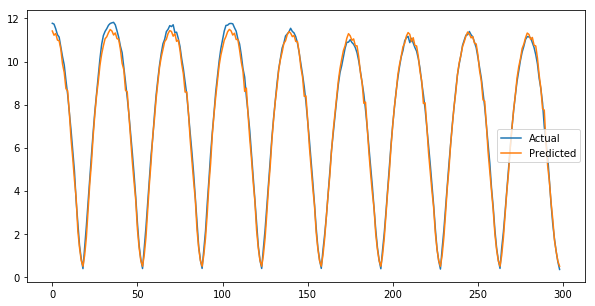

In [549]:
plt.figure(figsize=(10, 5))
y_pred = model.predict(test_data)
plt.plot(test_y)
plt.plot(y_pred)
plt.legend(["Actual","Predicted"])
print('Root mean Squared Error',math.sqrt(mean_squared_error(test_y,y_pred)))

Root mean Squared Error 0.4947847118155243


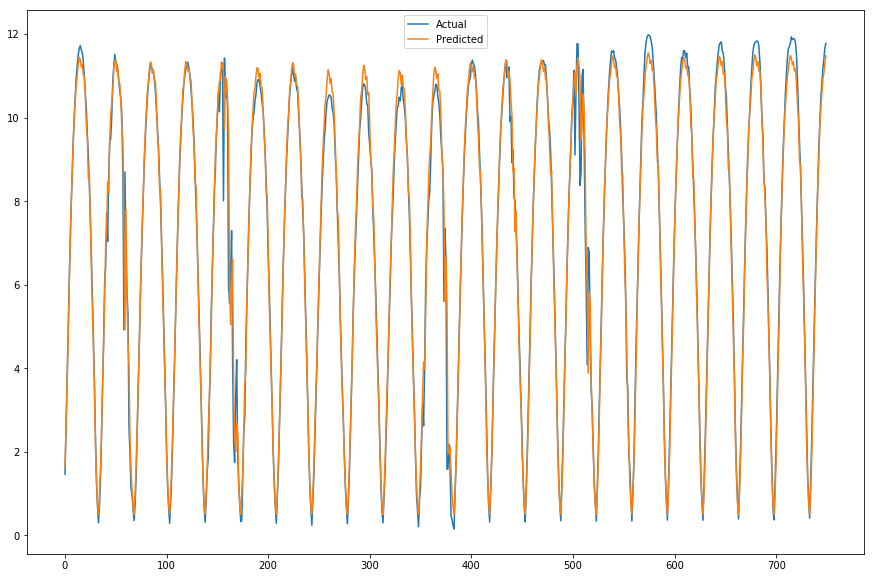

In [550]:
plt.figure(figsize=(15, 10))
y_pred = model.predict(train_data)
plt.plot(train_y)
plt.plot(y_pred)
plt.legend(["Actual","Predicted"])
print('Root mean Squared Error',math.sqrt(mean_squared_error(train_y,y_pred)))

### Using time of the Day, Energy and Temperature for prediction

<h5>X_train -> Time, Energy, Temperature</h5>

<h5>Y_train -> Predicted_Energy</h5>

In [802]:
time = []
for i in range(0,30):
    for j in energy.columns:
        time.append(j)

In [803]:
data.head()

,Temperature,Energy,Predicted_Energy
0,84.88,0.706,1.366
1,84.65,1.366,2.404
2,84.65,2.404,3.546
3,84.65,3.546,4.682
4,85.29,4.682,5.748


In [804]:
time = time[:len(time)-1]

In [805]:
data['Time'] = time

In [806]:
data.head()

,Temperature,Energy,Predicted_Energy,Time
0,84.88,0.706,1.366,06:40
1,84.65,1.366,2.404,07:00
2,84.65,2.404,3.546,07:20
3,84.65,3.546,4.682,07:40
4,85.29,4.682,5.748,08:00


In [807]:
# converting the data into one hot encoding
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(data['Time'].values.reshape(-1,1))
X = enc.transform(data['Time'].values.reshape(-1,1))

In [808]:
X.todense()

matrix([[1., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.]])

In [809]:
day_d = pd.DataFrame(X.todense())

In [810]:
data = pd.concat([data,day_d],axis=1)

In [811]:
data.head()

,Temperature,Energy,Predicted_Energy,Time,0,1,2,3,4,5,...,25,26,27,28,29,30,31,32,33,34
0,84.88,0.706,1.366,06:40,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,84.65,1.366,2.404,07:00,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,84.65,2.404,3.546,07:20,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,84.65,3.546,4.682,07:40,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,85.29,4.682,5.748,08:00,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [812]:
data = data.drop(['Time'],axis=1)

In [813]:
train = data.iloc[:700]
test = data.iloc[700:969]

In [814]:
X_train = train.drop(['Predicted_Energy'],axis=1)
y_train = train['Predicted_Energy']
X_test = test.drop(['Predicted_Energy'],axis=1)
y_test = test['Predicted_Energy']

In [815]:
X_train.head()

,Temperature,Energy,0,1,2,3,4,5,6,7,...,25,26,27,28,29,30,31,32,33,34
0,84.88,0.706,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,84.65,1.366,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,84.65,2.404,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,84.65,3.546,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,85.29,4.682,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [816]:
y_train.head()

0    1.366
1    2.404
2    3.546
3    4.682
4    5.748
Name: Predicted_Energy, dtype: float64

In [817]:
from sklearn.svm import SVR
opt_v = 99999
y_opt = []
for c in [.001,.01,.1,1,10,100,1000]:
    reg = SVR(kernel='linear',gamma = 'auto',C=c)
    reg.fit(X_train,y_train)
    y_pred = reg.predict(X_test)
    y_pred1 = reg.predict(X_train)
    m = mean_squared_error(y_test,y_pred)
    m1 = mean_squared_error(y_train,y_pred1)
    print("Root Mean squared error using SVM on test data:", math.sqrt(m))
    #print("Root Mean squared error using SVM on train data:", math.sqrt(m1))
    if math.sqrt(m) < opt_v:
        opt_v = math.sqrt(m)
        y_opt = y_pred

Root Mean squared error using SVM on test data: 0.382569855735952
Root Mean squared error using SVM on test data: 0.3377384049478417
Root Mean squared error using SVM on test data: 0.22475123282694956
Root Mean squared error using SVM on test data: 0.12655168472984565
Root Mean squared error using SVM on test data: 0.12000142334046397
Root Mean squared error using SVM on test data: 0.3017535239528549
Root Mean squared error using SVM on test data: 2.2350064184236396


Mean squared error using SVM : 0.12000142334046397
MAPE using SVM : 0.9092680771874874


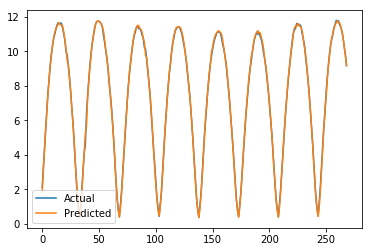

In [818]:
plt.plot(y_test.values)
plt.plot(y_opt)
plt.legend(["Actual","Predicted"])
print("Mean squared error using SVM :", opt_v)
print("MAPE using SVM :", MAPE(y_test.values,y_opt))

In [821]:
from sklearn.svm import SVR

# applying SVM over the data using rbf kernel
from sklearn.svm import SVR
opt_v = 99999
y_opt = []
for c in [.001,.01,.1,1,10,100,1000]:
    reg = SVR(kernel='rbf',gamma = 'auto',C=c)
    reg.fit(X_train,y_train)
    y_pred = reg.predict(X_test)
    y_pred1 = reg.predict(X_train)
    m = mean_squared_error(y_test,y_pred)
    m1 = mean_squared_error(y_train,y_pred1)
    print("Root Mean squared error using SVM on test data:", math.sqrt(m))
    #print("Root Mean squared error using SVM on train data:", math.sqrt(m1))
    if math.sqrt(m) < opt_v:
        opt_v = math.sqrt(m)
        y_opt = y_pred

Root Mean squared error using SVM on test data: 3.5651394494309994
Root Mean squared error using SVM on test data: 2.9453027781841348
Root Mean squared error using SVM on test data: 0.8095838592570229
Root Mean squared error using SVM on test data: 0.3030995761095935
Root Mean squared error using SVM on test data: 0.27435153137432905
Root Mean squared error using SVM on test data: 0.20546604897308757
Root Mean squared error using SVM on test data: 0.20994036589554887


Mean squared error using SVM : 0.20546604897308757
MAPE using SVM : -0.6099587670874739


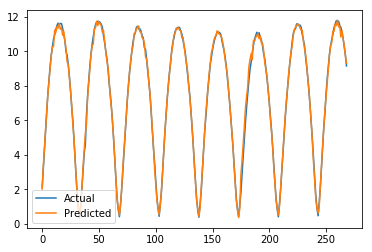

In [822]:
plt.plot(y_test.values)
plt.plot(y_opt)
plt.legend(["Actual","Predicted"])
print("Mean squared error using SVM :", opt_v)
print("MAPE using SVM :", MAPE(y_test.values,y_opt))

### Applying SVM

## Using Temperature, Time, Previous Energy Produced, Humidity 
<h5>X_train -> Temperature, Time, Humidity</h5>
<h5>Y_train -> Energy</h5>

In [823]:
data['humidity']  = hum[:len(hum)-1]

In [824]:
data.head()

,Temperature,Energy,Predicted_Energy,0,1,2,3,4,5,6,...,26,27,28,29,30,31,32,33,34,humidity
0,84.88,0.706,1.366,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.51
1,84.65,1.366,2.404,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.49
2,84.65,2.404,3.546,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.49
3,84.65,3.546,4.682,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.49
4,85.29,4.682,5.748,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.48


In [825]:
X_train = data.drop(['Predicted_Energy'],axis=1).iloc[:700]
y_train = data['Predicted_Energy'].iloc[:700]
X_test = data.drop(['Predicted_Energy'],axis=1).iloc[700:]
y_test = data['Predicted_Energy'].iloc[700:]

In [826]:
X_train.head()

,Temperature,Energy,0,1,2,3,4,5,6,7,...,26,27,28,29,30,31,32,33,34,humidity
0,84.88,0.706,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.51
1,84.65,1.366,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.49
2,84.65,2.404,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.49
3,84.65,3.546,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.49
4,85.29,4.682,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.48


In [827]:
opt_v = 99999
y_opt = []
for c in [.001,.01,.1,1,10,100,1000]:
    reg = SVR(kernel='rbf',gamma = 'auto',C=c)
    reg.fit(X_train,y_train)
    y_pred = reg.predict(X_test)
    y_pred1 = reg.predict(X_train)
    m = mean_squared_error(y_test,y_pred)
    m1 = mean_squared_error(y_train,y_pred1)
    print("Root Mean squared error using SVM on test data:", math.sqrt(m))
    #print("Root Mean squared error using SVM on train data:", math.sqrt(m1))
    if math.sqrt(m) < opt_v:
        opt_v = math.sqrt(m)
        y_opt = y_pred

Root Mean squared error using SVM on test data: 3.613246035636323
Root Mean squared error using SVM on test data: 3.0308113963097028
Root Mean squared error using SVM on test data: 1.04878043838209
Root Mean squared error using SVM on test data: 0.506660773697509
Root Mean squared error using SVM on test data: 0.38872306671366075
Root Mean squared error using SVM on test data: 0.2401303219152098
Root Mean squared error using SVM on test data: 0.2386947537174345


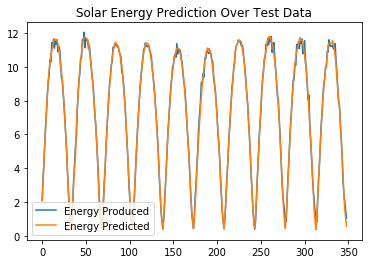

Optimal Result of the model : 0.2386947537174345
MAPE using SVM : -1.684283770554462


In [829]:
plt.plot(y_opt)
plt.plot(y_test.values)
plt.legend(["Energy Produced","Energy Predicted"])
plt.title("Solar Energy Prediction Over Test Data")
plt.show()
print("Optimal Result of the model :", opt_v)
print("MAPE using SVM :", MAPE(y_test.values,y_opt))

In [830]:
opt_v = 99999
y_opt = []
for c in [.001,.01,.1,1,10,100,1000]:
    reg = SVR(kernel='linear',gamma = 'auto',C=c)
    reg.fit(X_train,y_train)
    y_pred = reg.predict(X_test)
    y_pred1 = reg.predict(X_train)
    m = mean_squared_error(y_test,y_pred)
    m1 = mean_squared_error(y_train,y_pred1)
    print("Root Mean squared error using SVM on test data:", math.sqrt(m))
    #print("Root Mean squared error using SVM on train data:", math.sqrt(m1))
    if math.sqrt(m) < opt_v:
        opt_v = math.sqrt(m)
        y_opt = y_pred

Root Mean squared error using SVM on test data: 0.4023335657604889
Root Mean squared error using SVM on test data: 0.36700323982963595
Root Mean squared error using SVM on test data: 0.24646354798079548
Root Mean squared error using SVM on test data: 0.13051327154390485
Root Mean squared error using SVM on test data: 0.12429009866083322
Root Mean squared error using SVM on test data: 0.3844230066752455
Root Mean squared error using SVM on test data: 2.5115187738302382


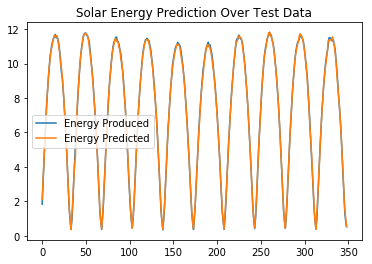

Optimal Result of the model : 0.12429009866083322
MAPE using SVM : 0.9084694299495778


In [831]:
plt.plot(y_opt)
plt.plot(y_test.values)
plt.legend(["Energy Produced","Energy Predicted"])
plt.title("Solar Energy Prediction Over Test Data")
plt.show()
print("Optimal Result of the model :", opt_v)
print("MAPE using SVM :", MAPE(y_test.values,y_opt))

In [832]:
from sklearn.svm import SVR

# applying SVM over the data using rbf kernel
from sklearn.svm import SVR
opt_v = 99999
y_opt = []
for c in [.001,.01,.1,1,10,100,1000]:
    reg = SVR(kernel='rbf',gamma = 'auto',C=c)
    reg.fit(X_train,y_train)
    y_pred = reg.predict(X_test)
    y_pred1 = reg.predict(X_train)
    m = mean_squared_error(y_test,y_pred)
    m1 = mean_squared_error(y_train,y_pred1)
    print("Root Mean squared error using SVM on test data:", math.sqrt(m))
    #print("Root Mean squared error using SVM on train data:", math.sqrt(m1))
    if math.sqrt(m) < opt_v:
        opt_v = math.sqrt(m)
        y_opt = y_pred
print("Mean squared error using SVM on Test:", opt_v)

Root Mean squared error using SVM on test data: 3.613246035636323
Root Mean squared error using SVM on test data: 3.0308113963097028
Root Mean squared error using SVM on test data: 1.04878043838209
Root Mean squared error using SVM on test data: 0.506660773697509
Root Mean squared error using SVM on test data: 0.38872306671366075
Root Mean squared error using SVM on test data: 0.2401303219152098
Root Mean squared error using SVM on test data: 0.2386947537174345
Mean squared error using SVM on Test: 0.2386947537174345


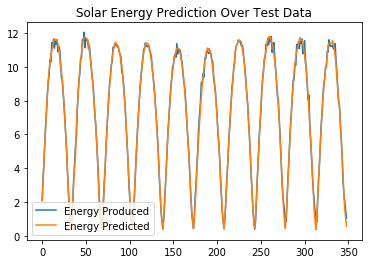

Mean squared error using SVM on Test: 0.2386947537174345
MAPE using SVM : -1.684283770554462


In [834]:
plt.plot(y_opt)
plt.plot(y_test.values)
plt.legend(["Energy Produced","Energy Predicted"])
plt.title("Solar Energy Prediction Over Test Data")
plt.show()
print("Mean squared error using SVM on Test:", opt_v)
print("MAPE using SVM :", MAPE(y_test.values,y_opt))

In [835]:
from sklearn.svm import SVR
reg = SVR(kernel='poly',gamma = 'auto',C=.0001)
reg.fit(X_train.drop(['Energy'],axis=1),y_train)
y_pred = reg.predict(X_test.drop(['Energy'],axis=1))
m = mean_squared_error(y_test,y_pred)
y_pred1 = reg.predict(X_train.drop(['Energy'],axis=1))
m1 = mean_squared_error(y_train,y_pred1)
print("Mean squared error using SVM on Test:", math.sqrt(m))
print("Mean squared error using SVM on Train:", math.sqrt(m1))

Mean squared error using SVM on Test: 0.37790895325648555
Mean squared error using SVM on Train: 0.9449470730327155


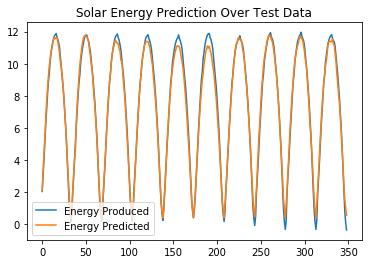

Mean squared error using SVM on Test: 0.37790895325648555
MAPE using SVM : 4.97110791826271


In [837]:
plt.plot(y_pred)
plt.plot(y_test.values)
plt.legend(["Energy Produced","Energy Predicted"])
plt.title("Solar Energy Prediction Over Test Data")
plt.show()
print("Mean squared error using SVM on Test:", math.sqrt(m))
print("MAPE using SVM :", MAPE(y_test.values,y_pred))

### Applying SVM
<h5>X_train -> Temperature, Time, Previous Energy</h5>
<h5>Y_train -> Energy</h5>

In [839]:
from sklearn.svm import SVR
reg = SVR(kernel='linear',gamma = 'auto',C=10)
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
m = mean_squared_error(y_test,y_pred)
print("Mean squared error using SVM :", math.sqrt(m))
print("MAPE using SVM :", MAPE(y_test.values,y_pred))

Mean squared error using SVM : 0.12429009866083322
MAPE using SVM : 0.9084694299495778


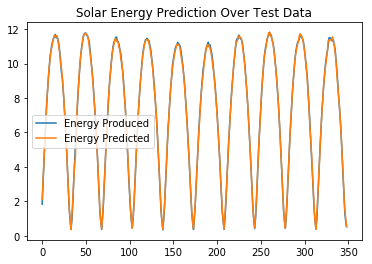

In [840]:
plt.plot(y_pred)
plt.plot(y_test.values)
plt.legend(["Energy Produced","Energy Predicted"])
plt.title("Solar Energy Prediction Over Test Data")
plt.show()

In [841]:
# applying SVM over the data using rbf kernel
from sklearn.svm import SVR
opt_v = 99999
y_opt = []
for c in [.001,.01,.1,1,10,100,1000]:
    reg = SVR(kernel='rbf',gamma = 'auto',C=c)
    reg.fit(X_train,y_train)
    y_pred = reg.predict(X_test)
    y_pred1 = reg.predict(X_train)
    m = mean_squared_error(y_test,y_pred)
    m1 = mean_squared_error(y_train,y_pred1)
    print("Root Mean squared error using SVM on test data:", math.sqrt(m))
    #print("Root Mean squared error using SVM on train data:", math.sqrt(m1))
    if math.sqrt(m) < opt_v:
        opt_v = math.sqrt(m)
        y_opt = y_pred

Root Mean squared error using SVM on test data: 3.613246035636323
Root Mean squared error using SVM on test data: 3.0308113963097028
Root Mean squared error using SVM on test data: 1.04878043838209
Root Mean squared error using SVM on test data: 0.506660773697509
Root Mean squared error using SVM on test data: 0.38872306671366075
Root Mean squared error using SVM on test data: 0.2401303219152098
Root Mean squared error using SVM on test data: 0.2386947537174345


In [844]:
m = mean_squared_error(y_test,y_pred)
print("MAPE using SVM :", MAPE(y_test.values,y_opt))
print("Optimal Result of the Model :",opt_v)

MAPE using SVM : -1.684283770554462
Optimal Result of the Model : 0.2386947537174345


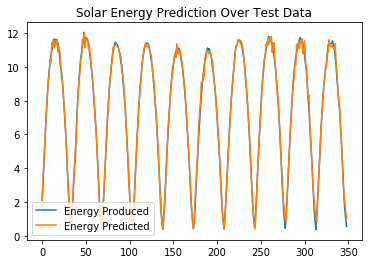

In [845]:
plt.plot(y_test.values)
plt.plot(y_opt)
plt.legend(["Energy Produced","Energy Predicted"])
plt.title("Solar Energy Prediction Over Test Data")
plt.show()

In [846]:
# applying SVM over the data using rbf kernel
from sklearn.svm import SVR
opt_v = 99999
y_opt = []
for c in [.001,.01,.1,1,10,100,1000]:
    reg = SVR(kernel='poly',gamma = 'auto',C=c)
    reg.fit(X_train,y_train)
    y_pred = reg.predict(X_test)
    y_pred1 = reg.predict(X_train)
    m = mean_squared_error(y_test,y_pred)
    m1 = mean_squared_error(y_train,y_pred1)
    print("Root Mean squared error using SVM on test data:", math.sqrt(m))
    #print("Root Mean squared error using SVM on train data:", math.sqrt(m1))
    if math.sqrt(m) < opt_v:
        opt_v = math.sqrt(m)
        y_opt = y_pred

Root Mean squared error using SVM on test data: 0.3445363802824145
Root Mean squared error using SVM on test data: 0.33078113377063983
Root Mean squared error using SVM on test data: 0.5371661012907146
Root Mean squared error using SVM on test data: 3.9904443625886206
Root Mean squared error using SVM on test data: 47.15988909483351
Root Mean squared error using SVM on test data: 447.5500184693151
Root Mean squared error using SVM on test data: 4254.219996042094


In [847]:
print("Optimal Result of the Model :",opt_v)
print("MAPE using SVM :", MAPE(y_test.values,y_opt))

Optimal Result of the Model : 0.33078113377063983
MAPE using SVM : 7.3117440379164504


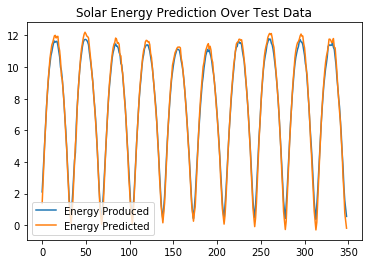

In [848]:
plt.plot(y_test.values)
plt.plot(y_opt)
plt.legend(["Energy Produced","Energy Predicted"])
plt.title("Solar Energy Prediction Over Test Data")
plt.show()

## Using Temperature, Time, Previous Energy Produced, Humidity 
<h5>X_train -> Temperature, Previous Energy, Time, Humidity</h5>
<h5>Y_train -> Energy</h5>

In [849]:
data.head()

,Temperature,Energy,Predicted_Energy,0,1,2,3,4,5,6,...,26,27,28,29,30,31,32,33,34,humidity
0,84.88,0.706,1.366,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.51
1,84.65,1.366,2.404,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.49
2,84.65,2.404,3.546,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.49
3,84.65,3.546,4.682,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.49
4,85.29,4.682,5.748,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.48


In [850]:
data['Humidity'] = hum[:len(hum)-1] 

In [851]:
data.head()

,Temperature,Energy,Predicted_Energy,0,1,2,3,4,5,6,...,27,28,29,30,31,32,33,34,humidity,Humidity
0,84.88,0.706,1.366,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.51,0.51
1,84.65,1.366,2.404,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.49,0.49
2,84.65,2.404,3.546,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.49,0.49
3,84.65,3.546,4.682,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.49,0.49
4,85.29,4.682,5.748,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.48,0.48


In [852]:
train = data.iloc[:700]
test = data.iloc[700:969]

In [853]:
X_train = train.drop(['Predicted_Energy'],axis=1)
y_train = train['Predicted_Energy']
X_test = test.drop(['Predicted_Energy'],axis=1)
y_test = test['Predicted_Energy']

### Applying machine learning models over this dataset :

In [854]:
from sklearn.svm import SVR
reg = SVR(kernel='rbf',degree=1,gamma = 'auto',C=14)
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)

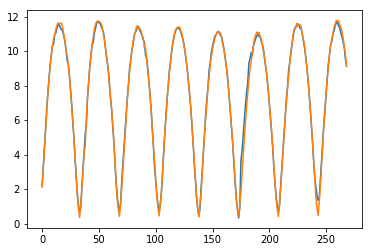

In [855]:
plt.plot(y_pred)
plt.plot(y_test.values)
plt.show()

In [856]:
m = mean_squared_error(y_test,y_pred)
print("Mean squared error using SVM :", math.sqrt(m))
print("MAPE using SVM :", MAPE(y_test.values,y_pred))

Mean squared error using SVM : 0.267236146790922
MAPE using SVM : -3.631792992848388


## Time, Humidity, Temperature

In [857]:
train = data.iloc[:700]
test = data.iloc[700:969]

In [858]:
X_train = train.drop(['Predicted_Energy','Energy'],axis=1)
y_train = train['Energy']
X_test = test.drop(['Predicted_Energy','Energy'],axis=1)
y_test = test['Energy']

In [859]:
X_train.shape,y_train.shape

((700, 38), (700,))

In [860]:
# applying SVM over the data using rbf kernel
from sklearn.svm import SVR
opt_v = 99999
y_opt = []
for c in [.001,.01,.1,1,10,100,1000]:
    reg = SVR(kernel='linear',gamma = 'auto',C=c)
    reg.fit(X_train,y_train)
    y_pred = reg.predict(X_test)
    y_pred1 = reg.predict(X_train)
    m = mean_squared_error(y_test,y_pred)
    m1 = mean_squared_error(y_train,y_pred1)
    print("Root Mean squared error using SVM on test data:", math.sqrt(m))
    #print("Root Mean squared error using SVM on train data:", math.sqrt(m1))
    if math.sqrt(m) < opt_v:
        opt_v = math.sqrt(m)
        y_opt = y_pred

Root Mean squared error using SVM on test data: 3.6631819081344292
Root Mean squared error using SVM on test data: 3.5220439924771987
Root Mean squared error using SVM on test data: 2.192115506727029
Root Mean squared error using SVM on test data: 0.30546855627212194
Root Mean squared error using SVM on test data: 0.3344459874046033
Root Mean squared error using SVM on test data: 0.6819039699188539
Root Mean squared error using SVM on test data: 7.402994081148202


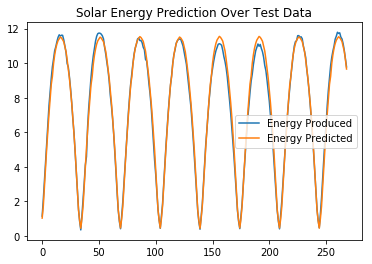

Mean squared error using SVM : 0.30546855627212194
MAPE using SVM : -0.23980564684978486


In [861]:
plt.plot(y_test.values)
plt.plot(y_opt)
plt.legend(["Energy Produced","Energy Predicted"])
plt.title("Solar Energy Prediction Over Test Data")
plt.show()
#m = mean_squared_error(y_test,y_pred)
print("Mean squared error using SVM :", opt_v)
print("MAPE using SVM :", MAPE(y_test.values,y_opt))

In [862]:
# applying SVM over the data using rbf kernel
from sklearn.svm import SVR
opt_v = 99999
y_opt = []
for c in [.001,.01,.1,1,10,100,1000]:
    reg = SVR(kernel='rbf',gamma = 'auto',C=c)
    reg.fit(X_train,y_train)
    y_pred = reg.predict(X_test)
    y_pred1 = reg.predict(X_train)
    m = mean_squared_error(y_test,y_pred)
    m1 = mean_squared_error(y_train,y_pred1)
    print("Root Mean squared error using SVM on test data:", math.sqrt(m))
    #print("Root Mean squared error using SVM on train data:", math.sqrt(m1))
    if math.sqrt(m) < opt_v:
        opt_v = math.sqrt(m)
        y_opt = y_pred

Root Mean squared error using SVM on test data: 3.6210937705402975
Root Mean squared error using SVM on test data: 3.301594910651372
Root Mean squared error using SVM on test data: 2.8338251181019003
Root Mean squared error using SVM on test data: 2.6676153263593108
Root Mean squared error using SVM on test data: 1.1863593218260668
Root Mean squared error using SVM on test data: 0.5466823325678432
Root Mean squared error using SVM on test data: 0.5293002218062318


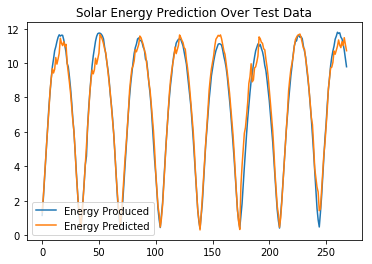

Mean squared error using SVM : 0.5293002218062318
MAPE using SVM : -5.34837491631926


In [863]:
plt.plot(y_test.values)
plt.plot(y_opt)
plt.legend(["Energy Produced","Energy Predicted"])
plt.title("Solar Energy Prediction Over Test Data")
plt.show()
#m = mean_squared_error(y_test,y_pred)
print("Mean squared error using SVM :", opt_v)
print("MAPE using SVM :", MAPE(y_test.values,y_opt))

In [746]:
# applying SVM over the data using rbf kernel
from sklearn.svm import SVR
opt_v = 99999
y_opt = []
for c in [.001,.01,.1,1,10,100,1000]:
    reg = SVR(kernel='poly',gamma = 'auto',C=c)
    reg.fit(X_train,y_train)
    y_pred = reg.predict(X_test)
    y_pred1 = reg.predict(X_train)
    m = mean_squared_error(y_test,y_pred)
    m1 = mean_squared_error(y_train,y_pred1)
    print("Root Mean squared error using SVM on test data:", math.sqrt(m))
    #print("Root Mean squared error using SVM on train data:", math.sqrt(m1))
    if math.sqrt(m) < opt_v:
        opt_v = math.sqrt(m)
        y_opt = y_pred

Root Mean squared error using SVM on test data: 0.5224977652725356
Root Mean squared error using SVM on test data: 0.5572906396359355
Root Mean squared error using SVM on test data: 0.9212505494217959
Root Mean squared error using SVM on test data: 6.971659451808954
Root Mean squared error using SVM on test data: 94.25788662952714
Root Mean squared error using SVM on test data: 839.5733285163071
Root Mean squared error using SVM on test data: 8742.201010625755


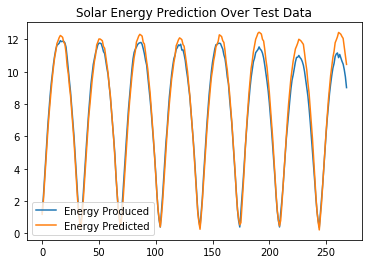

Mean squared error using SVM : 0.5224977652725356


In [747]:
plt.plot(y_test.values)
plt.plot(y_opt)
plt.legend(["Energy Produced","Energy Predicted"])
plt.title("Solar Energy Prediction Over Test Data")
plt.show()
#m = mean_squared_error(y_test,y_pred)
print("Mean squared error using SVM :", opt_v)

## Applying VAR Model

In [456]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from statsmodels.tsa.vector_ar.var_model import VAR
%matplotlib inline

In [457]:
johan_test_temp = data
coint_johansen(johan_test_temp,-1,1).eig

C:\Users\karan\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:609: HypothesisTestWarning: Critical values are only available for time series with 12 variables at most.
  category=HypothesisTestWarning)


LinAlgError: Matrix is not positive definite

1. From the above result we can see that eigen values are less then 1 so our data is stationary

In [458]:
data.head()

,Temperature,Energy,Predicted_Energy,0,1,2,3,4,5,6,...,26,27,28,29,30,31,32,33,34,Humidity
0,84.88,0.772,1.458,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.51
1,84.65,1.458,2.518,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.49
2,84.65,2.518,3.642,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.49
3,84.65,3.642,4.746,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.49
4,85.29,4.746,5.948,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.48


In [459]:
data1 = data[['Temperature','Energy','Humidity','Predicted_Energy']]

In [460]:
#creating the train and validation set
train = data1[:int(0.8*(len(data1)))]
test = data1[int(0.8*(len(data1))):]

In [461]:
train.shape,test.shape

((839, 4), (210, 4))

In [462]:
#fit the model
model = VAR(endog=train)
model_fit = model.fit()

In [476]:
model_fit.y

array([[ 84.88 ,   0.772,   0.51 ,   1.458],
       [ 84.65 ,   1.458,   0.49 ,   2.518],
       [ 84.65 ,   2.518,   0.49 ,   3.642],
       ...,
       [108.68 ,   2.428,   0.17 ,   1.408],
       [108.68 ,   1.408,   0.17 ,   0.782],
       [108.68 ,   0.782,   0.17 ,   0.393]])

In [477]:
# make prediction on the test dataset
prediction = model_fit.forecast(model_fit.y, steps=len(test))

In [468]:
#converting predictions to pandas dataframe
import math
from sklearn.metrics import mean_squared_error
pred = pd.DataFrame(index=range(0,len(prediction)),columns=data1.columns)
for j in range(0,4):
    for i in range(0, len(prediction)):
        pred.iloc[i][j] = prediction[i][j]

In [469]:
pred

,Temperature,Energy,Humidity,Predicted_Energy
0,104.17,0.393,0.253252,0.000369186
1,100.702,0.000369186,0.317014,-0.116589
2,97.3668,-0.116589,0.378693,0.0167526
3,94.2875,0.0167526,0.435943,0.374487
4,91.5462,0.374487,0.487167,0.925159
5,89.2067,0.925159,0.531104,1.63344
6,87.314,1.63344,0.566853,2.46168
7,85.8936,2.46168,0.593869,3.37136
8,84.953,3.37136,0.611955,4.32452
9,84.4826,4.32452,0.621237,5.28498


In [470]:
#printing the rmse of the model
for i in ['Temperature','Predicted_Energy']:
    print('rmse value for', i, 'is : ', math.sqrt(mean_squared_error(pred[i], test[i])))

rmse value for Temperature is :  9.696449313490003
rmse value for Predicted_Energy is :  3.4056020596881034


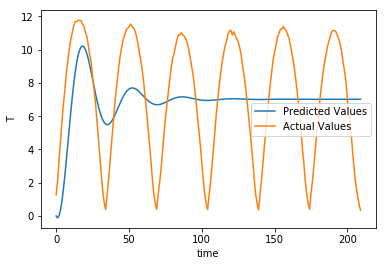

In [472]:
import matplotlib.pyplot as plt
plt.plot(pred['Predicted_Energy'].values)
plt.plot(test['Predicted_Energy'].values)
plt.xlabel("time")
plt.ylabel("T")
plt.legend(["Predicted Values","Actual Values"])

In [ ]:
1. Slide using bemer